In [1]:
import numpy as np
import magpylib as magpy
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap

In [2]:
mu0 = 4*np.pi*1e-7 # T*m/A
gamma_h = 42.5756  # MHz/T
b_z_earth = 65E-6 # T
rho_c = 1.678E-8  # ohm*m

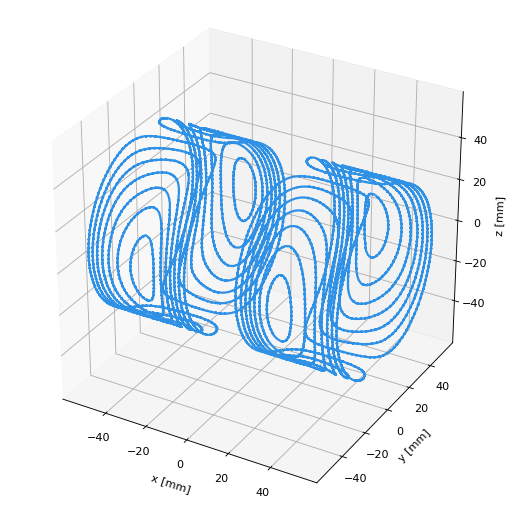

In [83]:
paths = []

I = 1
for i in range(32):
    #13
    if i in [13, 15, 18, 19]:
        continue
    try:
        paths.append(np.loadtxt(f"line_path/{i}.txt")[::2])
    except:
        pass

coils = []
for p in paths:
    coils.append(magpy.current.Line(I, p))
tot_coil = coils[0]
for c in coils[1:]:
    tot_coil+=c
tot_coil.show()

In [95]:
size = 100
ts = np.linspace(-25, 25, size)

XZx, XZz = np.meshgrid(ts, ts)
gridxz = np.array([[(x,0,z) for x in ts] for z in ts])

XYx, XYy = np.meshgrid(ts, ts)
gridxy = np.array([[(x,y,0) for x in ts] for y in ts])

YZy, YZz = np.meshgrid(ts, ts)
gridyz = np.array([[(0,y,z) for y in ts] for z in ts])

In [96]:
Bxy = tot_coil.getB(gridxy)

In [97]:
# Bxz = tot_coil.getB(gridxz)

In [98]:
Byz = tot_coil.getB(gridyz)

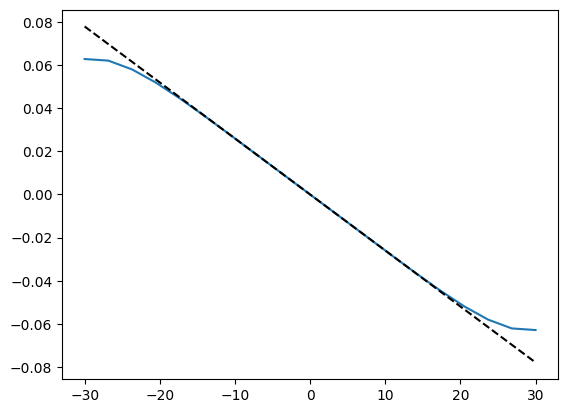

[-2.59608910e-03 -3.02487533e-05]


In [99]:
# Y grdient
y = np.linspace(-30, 30, 20)
y_l = np.linspace(-5, 5, 20)
sy = [magpy.Sensor((0, i, 0)) for i in y]
sy_l = [magpy.Sensor((0, i, 0)) for i in y_l]

By = tot_coil.getB(*sy)[:,0]
By_l = tot_coil.getB(*sy_l)[:,0]

# ciao

coef = np.polyfit(y_l,By_l,1)
poly1d_fn = np.poly1d(coef) 


grad_xy = gridxy[:,:,1]*coef[0]+coef[1]
grad_xy.shape

grad_yz = gridyz[:,:,1]*coef[0]+coef[1]
grad_yz.shape

plt.plot(y, By)
plt.plot(y, poly1d_fn(y), '--k')
plt.show()

print(coef)

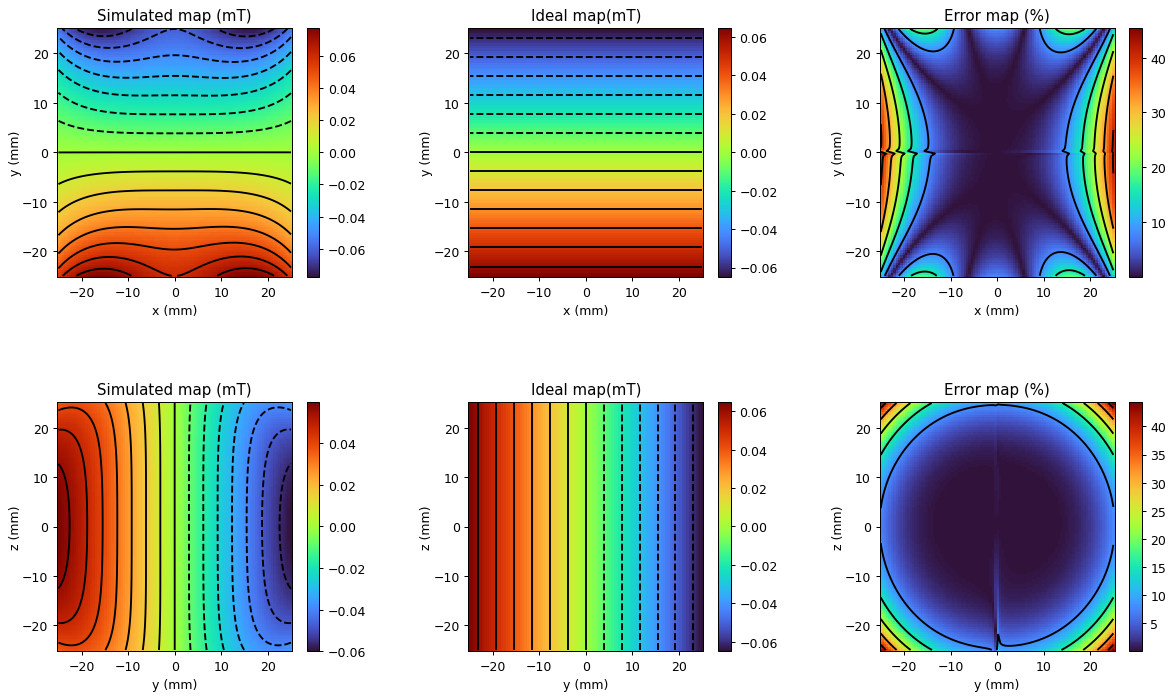

In [100]:
fig = plt.figure(figsize=(16, 9), dpi=90)
plt.subplot(2, 3, 1)

# XZ plane
p = plt.pcolormesh(XYx, XYy, Bxy[:,:,0], cmap="turbo")
# plt.streamplot(XYx, XYy, Bxy[:,:,0], Bxy[:,:,1], color='k', linewidth=1,density=0.8, arrowsize = 0, broken_streamlines=False)
plt.contour(XYx, XYy, Bxy[:,:,0], colors='k', levels=15)
plt.colorbar(p)
plt.ylabel("y (mm)", labelpad=0.1)
plt.xlabel("x (mm)")
plt.title("Simulated map (mT)")

plt.subplot(2, 3, 2)
p = plt.pcolor(XYx, XYy, grad_xy, cmap="turbo")
# plt.streamplot(XYx, XYy, Bxy[:,:,0], Bxy[:,:,1], color='k', linewidth=1,density=0.8, arrowsize = 0, broken_streamlines=False)
plt.contour(XYx, XYy, grad_xy, colors='k', levels=15)
plt.colorbar(p)
plt.ylabel("y (mm)", labelpad=0.1)
plt.xlabel("x (mm)")
plt.title("Ideal map(mT)")

err_xy = np.abs((grad_xy-Bxy[:,:,0])/grad_xy)
plt.subplot(2, 3, 3)
p = plt.pcolor(XYx, XYy, err_xy*100, cmap="turbo")
plt.contour(XYx, XYy, err_xy*100, colors='k', levels=6)
plt.colorbar(p)
plt.ylabel("y (mm)", labelpad=-0.2)
plt.xlabel("x (mm)")
plt.title("Error map (%)")

# YZ plane
plt.subplot(2, 3, 4)
p = plt.pcolormesh(YZy, YZz, Byz[:,:,0], cmap="turbo")
# plt.streamplot(YZy, YZz, Byz[:,:,0], Byz[:,:,1], color='k', linewidth=1,density=0.8, arrowsize = 0, broken_streamlines=False)
plt.contour(YZy, YZz, Byz[:,:,0], colors='k', levels=15)
plt.colorbar(p)
plt.ylabel("z (mm)", labelpad=0.1)
plt.xlabel("y (mm)")
plt.title("Simulated map (mT)")

plt.subplot(2, 3, 5)
p = plt.pcolor(YZy, YZz, grad_yz, cmap="turbo")
plt.contour(YZy, YZz, grad_yz, colors='k', levels=15)
plt.colorbar(p)
plt.ylabel("z (mm)", labelpad=0.1)
plt.xlabel("y (mm)")
plt.title("Ideal map(mT)")

err_yz = np.abs((grad_yz-Byz[:,:,0])/grad_yz)
plt.subplot(2, 3, 6)
p = plt.pcolor(YZy, YZz, err_yz*100, cmap="turbo")
plt.contour(YZy, YZz, err_yz*100, colors='k', levels=6)
plt.colorbar(p)
plt.ylabel("z (mm)", labelpad=-0.2)
plt.xlabel("y (mm)")
plt.title("Error map (%)")

plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.show()

In [90]:
cmap = pl.cm.Greys
cmap_gray = cmap(np.arange(cmap.N))
cmap_gray[:,-1] = np.linspace(0.5, 0.0, cmap.N)
my_cmap_gray = ListedColormap(cmap_gray)

cmap = pl.cm.jet
cmap_jet = cmap(np.arange(cmap.N))
cmap_jet[:,-1] = np.linspace(0.9, 1.0, cmap.N)
my_cmap_jet = ListedColormap(cmap_jet)

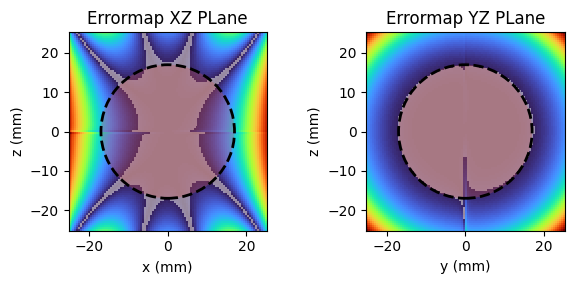

In [104]:
err = 0.01
fig , (ax0, ax1) = plt.subplots(1, 2)
ax0.set_title("Errormap XZ PLane")
ax0.set_xlabel("x (mm)")
ax0.set_ylabel("z (mm)")
ax0.set_aspect(1)
ax0.pcolormesh(XYx, XYy, err_xy, cmap="turbo")
r = 17
ax0.add_artist(plt.Circle((0, 0), r, alpha=0.3, linewidth=0, color="#ce5449", zorder=3))
ax0.add_artist(plt.Circle((0, 0), r, fill=False, linewidth=2, linestyle="dashed", zorder=3))
ax0.pcolormesh(XYx, XYy, abs(err_xy)>err, cmap=my_cmap_gray, zorder=1)


ax1.set_title("Errormap YZ PLane")
ax1.set_xlabel("y (mm)")
ax1.set_ylabel("z (mm)")
ax1.set_aspect(1)
ax1.pcolormesh(YZy, YZz, err_yz, cmap="turbo")

ax1.add_artist(plt.Circle((0, 0), r, alpha=0.3, linewidth=0, color="#ce5449", zorder=3))
ax1.add_artist(plt.Circle((0, 0), r, fill=False, linewidth=2, linestyle="dashed", zorder=3))
ax1.pcolormesh(YZy, YZz, abs(err_yz)>err, cmap=my_cmap_gray, zorder=1)

plt.subplots_adjust(wspace=0.5)
plt.show()